In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [47]:
data = np.loadtxt('he3.300-presn1', skiprows = 2, usecols = (1, 17, 18, 19, 20, 21, 23) )

mass = 0
he = 1
c = 2
n = 3
o = 4
ne = 5
si = 6

Mej_frac = 0.99

In [48]:
fe_he = 0
si_s = np.where( data[fe_he:, he] < 10**-2)[0][0] + fe_he
o_si_s = np.where( data[si_s:, o] > 10**-2)[0][0] + si_s
o_ne_mg = np.where( data[o_si_s:, ne] > data[o_si_s:, si])[0][0] + o_si_s
o_c = np.where( data[o_ne_mg:, c] > data[o_ne_mg:, ne])[0][0] + o_ne_mg


zones = [fe_he, si_s, o_si_s, o_ne_mg, o_c]

#The Ic stars will not have outer he layers, the Ib will
try:
    he_c = np.where( data[o_c:, he] > data[o_c:, o])[0][0] + o_c
    zones.append(he_c)

    try:
        he_n = np.where( data[he_c:, n] > data[he_c:, c])[0][0] + he_c
        zones.append(he_n)

    except:
        pass
except:
    pass

#Cut off all layers with velocity greater than vmax
outer_layer = np.where(data[:, mass]/data[-1, mass] > Mej_frac)[0][0]
if outer_layer <= zones[-1]:
    pass
else:
    zones.append(outer_layer)

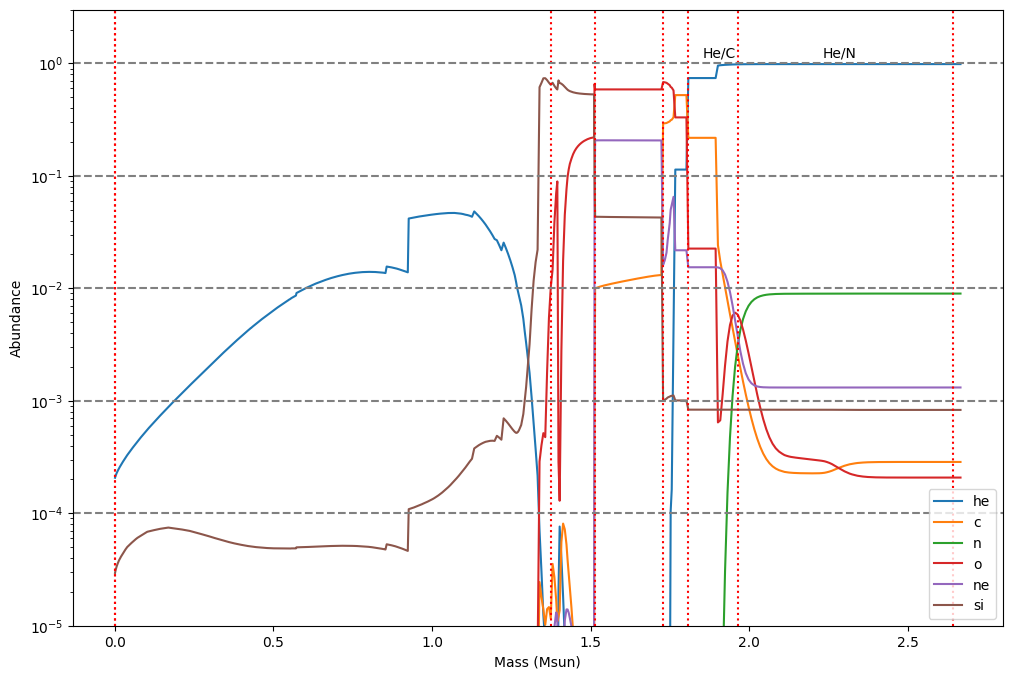

In [49]:
els = [he, c, n, o, ne, si]
els_names = ['he', 'c', 'n', 'o', 'ne', 'si']

for i in range(len(els_names)):
    plt.plot(data[:, mass]/(1.989*10**33), data[:, els[i]], label = els_names[i])

for i in range(len(zones)):
    plt.axvline(x = data[zones[i], mass]/(1.989*10**33), linestyle = ':', c = 'red')
    
for i in range(5):
    plt.axhline(y = 10**-i, linestyle = '--', c = 'gray')
    
plt.yscale('log')
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.ylim(10**-5, 3)
plt.legend()

fig.text(0.65, 0.82, 'He/C')
fig.text(0.75, 0.82, 'He/N')

plt.ylabel('Abundance')
plt.xlabel('Mass (Msun)')
plt.savefig('Progenitor_3p3_Woosley.png')
plt.show()

In [45]:
for i in range(len(zones)-1):
    print('Inner to outer boundary:', data[zones[i], mass]/(1.989*10**33), data[zones[i+1], mass]/(1.989*10**33))
    
    tot_mass_N = 0
    for j in range(zones[i+1]-zones[i]-1):
        tot_mass_N += (data[zones[i]+j+1, mass] -data[zones[i]+j, mass]) * data[zones[i]+j, n]
    print('Fraction of N in this zone:', tot_mass_N/(data[zones[i+1], mass] - data[zones[i], mass]))
    
sys.exit()

Inner to outer boundary: 0.0009000904977376266 0.0009000904977376266
Fraction of N in this zone: nan
Inner to outer boundary: 0.0009000904977376266 1.4343419602488472
Fraction of N in this zone: 1.595411272195941e-09
Inner to outer boundary: 1.4343419602488472 1.6584014335849475
Fraction of N in this zone: 2.9782703421582835e-10
Inner to outer boundary: 1.6584014335849475 2.061550485820273
Fraction of N in this zone: 3.881775993588495e-06
Inner to outer boundary: 2.061550485820273 2.214742888209751
Fraction of N in this zone: 1.6684088004808277e-10
Inner to outer boundary: 2.214742888209751 2.4195598445963253
Fraction of N in this zone: 4.876906665335813e-05
Inner to outer boundary: 2.4195598445963253 3.126582793973647
Fraction of N in this zone: 0.008567537598780236


/tmp/ipykernel_8730/1639749532.py:7: RuntimeWarning: invalid value encountered in double_scalars
  print('Fraction of N in this zone:', tot_mass_N/(data[zones[i+1], mass] - data[zones[i], mass]))


NameError: name 'sys' is not defined